In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
traindt = pd.read_csv('train.csv')
testdt = pd.read_csv('test.csv')
samp = pd.read_csv('gender_submission.csv')

In [3]:
traindt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
testdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
testdt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
traindt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
testdt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
traindt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
traindt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
testdt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Filling numerical missing values in traindt
traindt.Age = traindt.Age.fillna(traindt.Age.mean())
traindt.Fare = traindt.Fare.fillna(traindt.Fare.mean())


In [12]:
traindt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Handling categorical data in traindt
traindt['Embarked'].fillna(traindt['Embarked'].mode()[0], inplace=True)
traindt['Cabin'].fillna(traindt['Cabin'].mode()[0], inplace=True)


In [14]:
traindt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# Filling missing values in testdt
testdt.Age = testdt.Age.fillna(testdt.Age.mean())
testdt.Fare = testdt.Fare.fillna(testdt.Fare.mean())


In [16]:
# Filling missing vale in testdt
testdt['Cabin'].fillna(testdt['Cabin'].mode()[0], inplace=True)

In [17]:
testdt.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Visualising in traindt

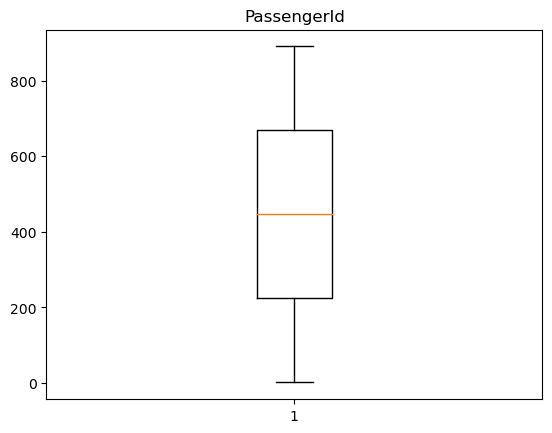

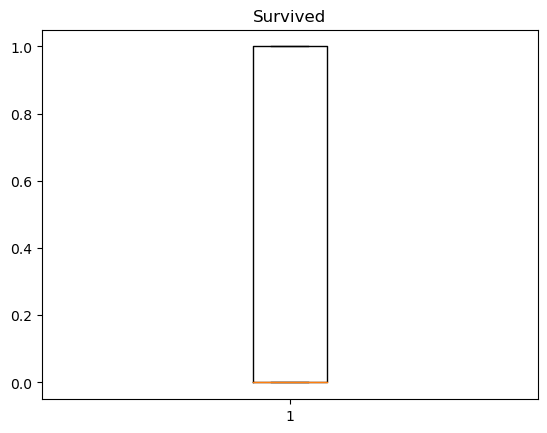

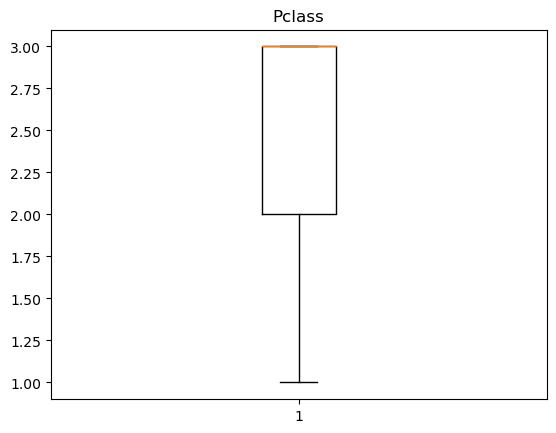

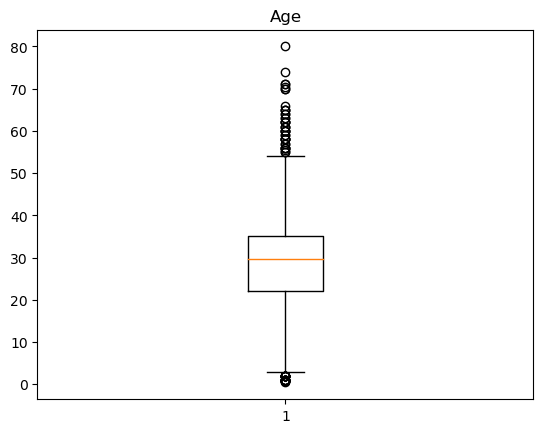

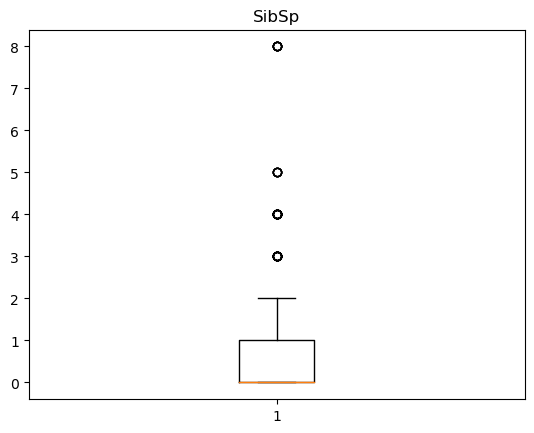

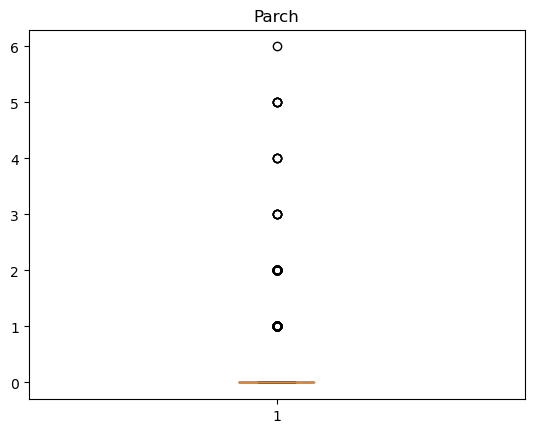

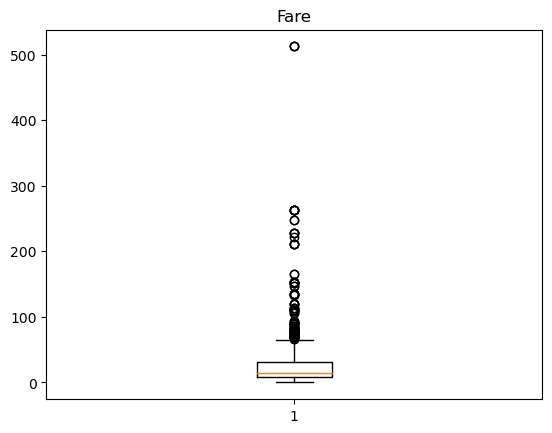

In [18]:
import matplotlib.pyplot as plt
for column in traindt.columns:
    if traindt[column].dtype=="int64" or traindt[column].dtype=="float64":
        #sns.scatterplot(x=traindt[column],data=traindt)
        plt.title(column)
        plt.boxplot(traindt[column])
        plt.show()
    

##

Visualising in testdt

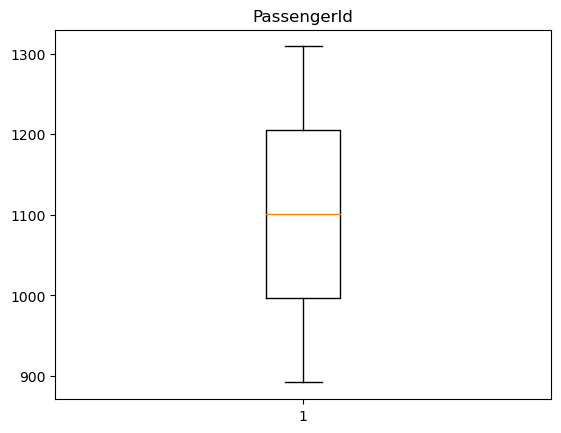

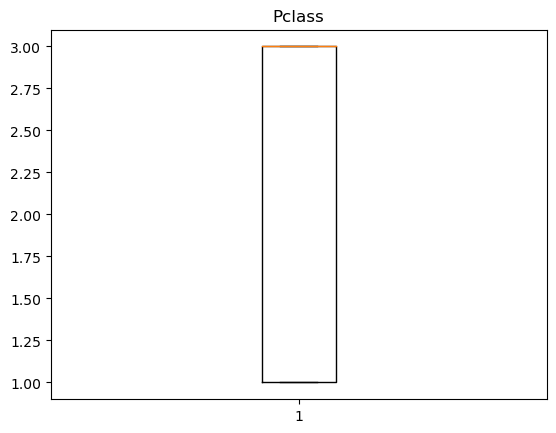

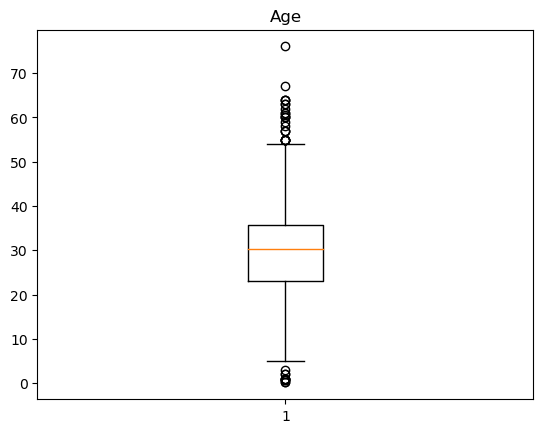

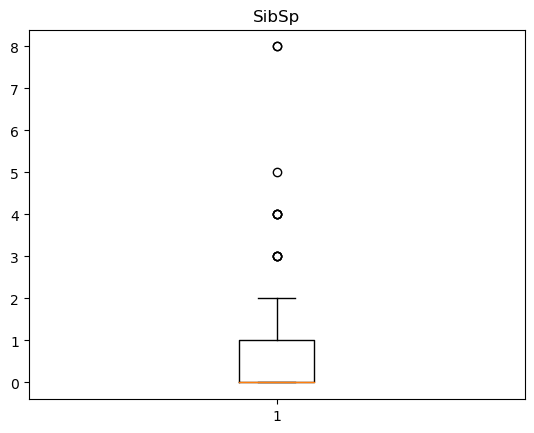

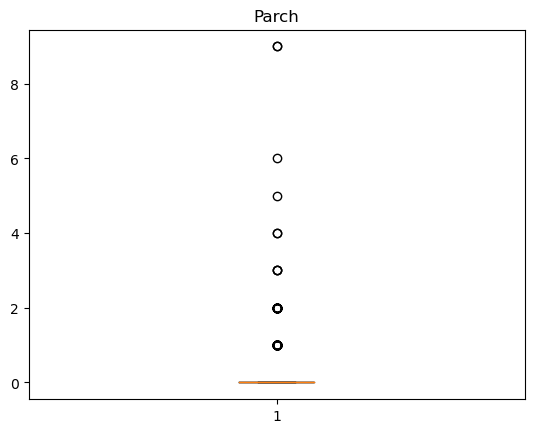

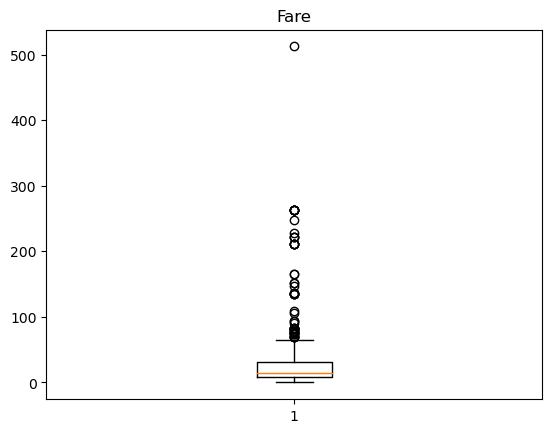

In [19]:
import matplotlib.pyplot as plt
for column in testdt.columns:
    if testdt[column].dtype=="int64" or testdt[column].dtype=="float64":
        #sns.scatterplot(x=traindt[column],data=traindt)
        plt.title(column)
        plt.boxplot(testdt[column])
        plt.show()
    

Visualing Categorical data

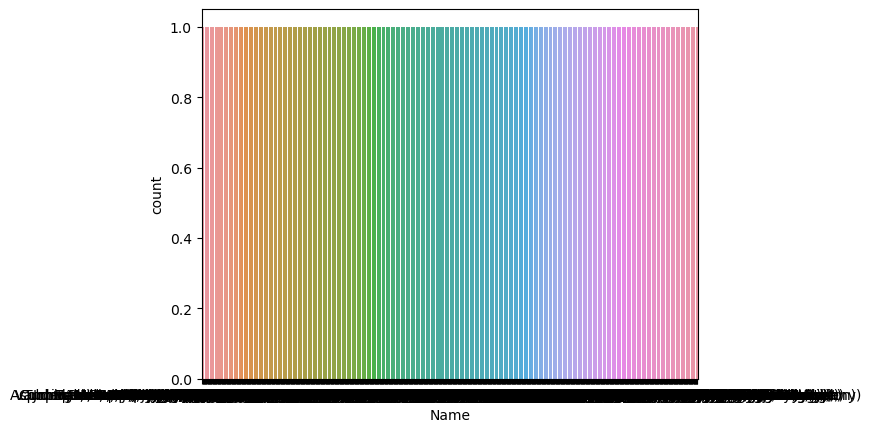

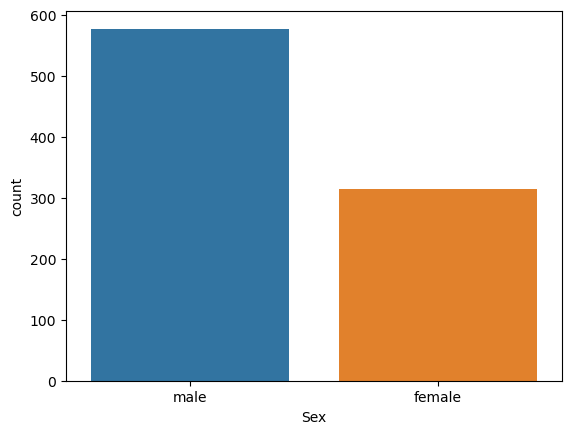

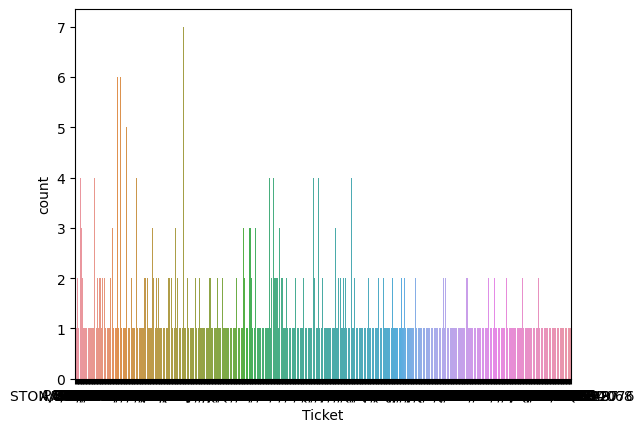

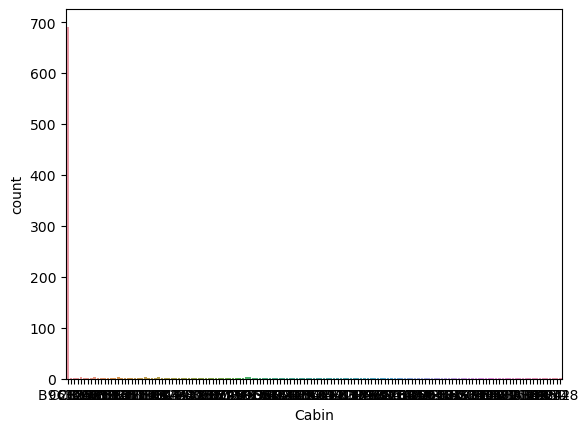

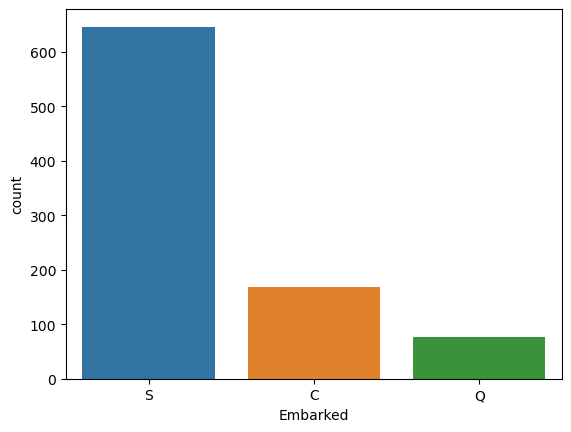

In [20]:
for column in traindt.columns:
    if traindt[column].dtype=="object":
        sns.countplot(x=traindt[column], data=traindt)
        plt.show()

Visualising Categorical data

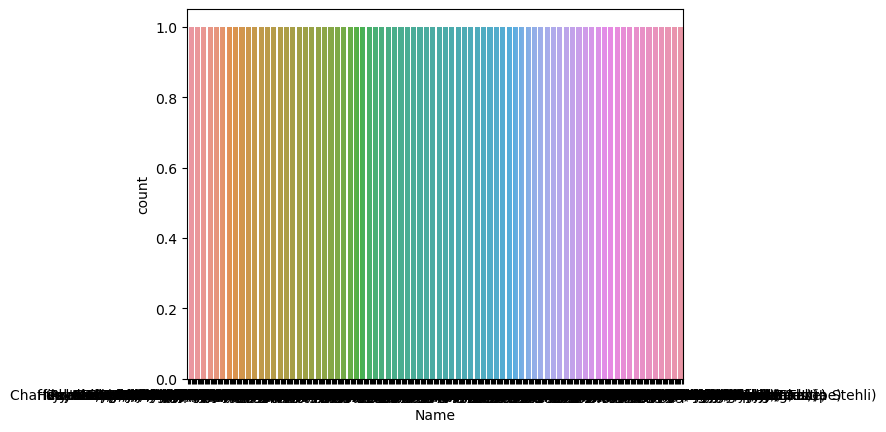

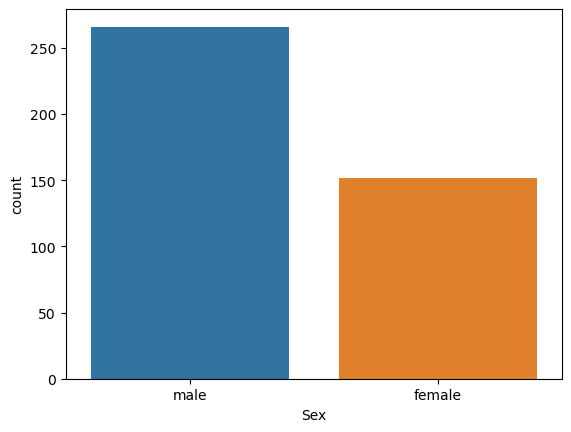

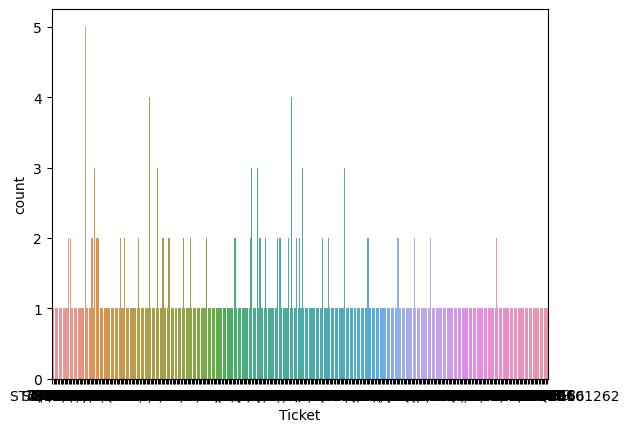

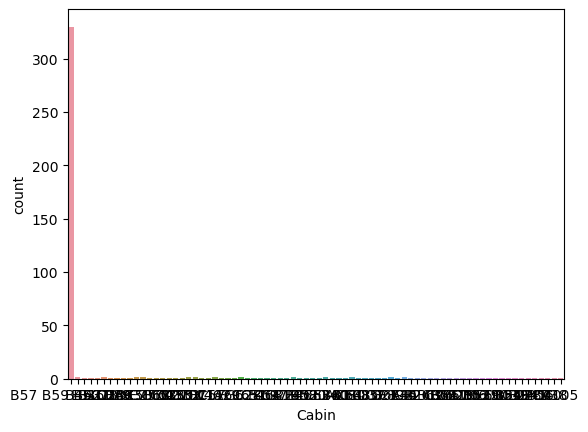

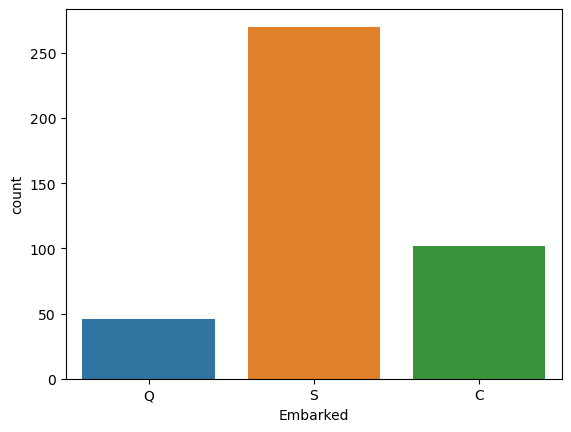

In [21]:
for column in testdt.columns:
    if testdt[column].dtype=="object":
        sns.countplot(x=testdt[column], data=testdt)
        plt.show()

Observation
missing value
Both traindt and testdt
    -Age
    -Sibsp
    -parch
    -Fare

      Handling Outlier using Capping and Flooring in traindt
                    Age

In [22]:
np.percentile(traindt.Age ,[99])[0]

65.0

In [23]:
uv = np.percentile(traindt.Age,[99])[0]

In [24]:
traindt[(traindt.Age>uv)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,B96 B98,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96 B98,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,B96 B98,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,B96 B98,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,B96 B98,S


In [25]:
traindt.Age[(traindt.Age> 1.5*uv)] =1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\1130803340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindt.Age[(traindt.Age> 1.5*uv)] =1.5*uv


In [26]:
traindt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Handling ouutlier in SibSp

In [27]:
np.percentile(traindt.SibSp,[99])[0]

5.0

In [28]:
uv = np.percentile(traindt.SibSp,[99])[0]

In [29]:
traindt[(traindt.SibSp>1.5*uv)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.55,B96 B98,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.55,B96 B98,S
201,202,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,CA. 2343,69.55,B96 B98,S
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.55,B96 B98,S
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.55,B96 B98,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.55,B96 B98,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.55,B96 B98,S


In [30]:
traindt.SibSp[(traindt.SibSp> 1.5*uv)] = 1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\1793730972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindt.SibSp[(traindt.SibSp> 1.5*uv)] = 1.5*uv


In [31]:
traindt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.519080,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.076655,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,7.500000,6.000000,512.329200


Handling outlier in Parch

In [32]:
np.percentile(traindt.Parch,[99])[0]

4.0

In [33]:
uv = np.percentile(traindt.Parch,[99])[0]

In [34]:
traindt[(traindt.Parch>1.5*uv)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
traindt.Parch[(traindt.Parch> 1.5*uv)] = 1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\1340440618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindt.Parch[(traindt.Parch> 1.5*uv)] = 1.5*uv


In [36]:
traindt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.519080,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.076655,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,7.500000,6.000000,512.329200


Handling outlier in Fare

In [37]:
np.percentile(traindt.Fare,[99])[0]

249.00622000000035

In [38]:
uv = np.percentile(traindt.Fare,[99])[0]

In [39]:
traindt[(traindt.Fare>1.5*uv)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0.0,0,PC 17755,512.3292,B96 B98,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0.0,0,PC 17755,512.3292,B101,C


In [40]:
traindt.Fare[(traindt.Fare> 1.5*uv)] = 1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\3297593640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindt.Fare[(traindt.Fare> 1.5*uv)] = 1.5*uv


In [41]:
traindt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.519080,0.381594,31.736801
std,257.353842,0.486592,0.836071,13.002015,1.076655,0.806057,45.660098
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,7.500000,6.000000,373.509330


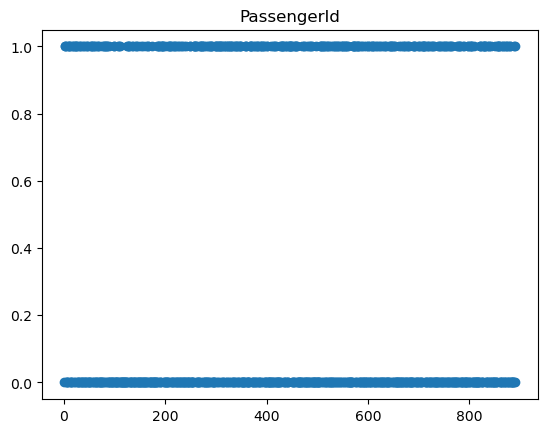

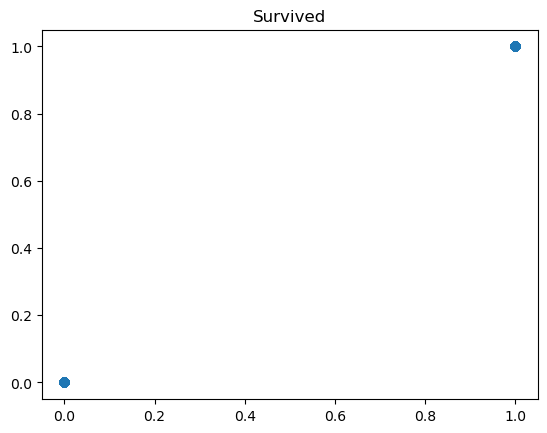

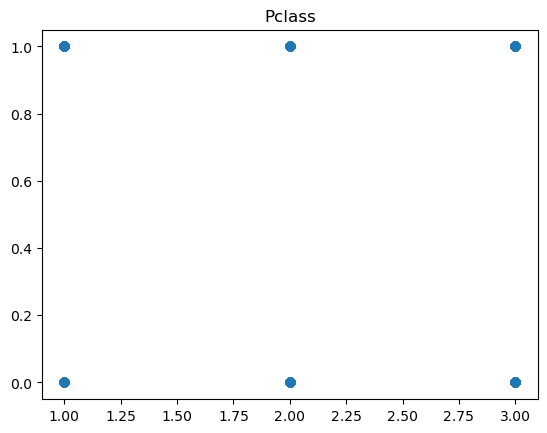

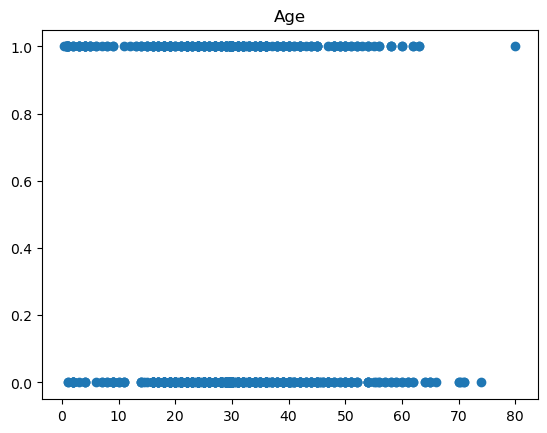

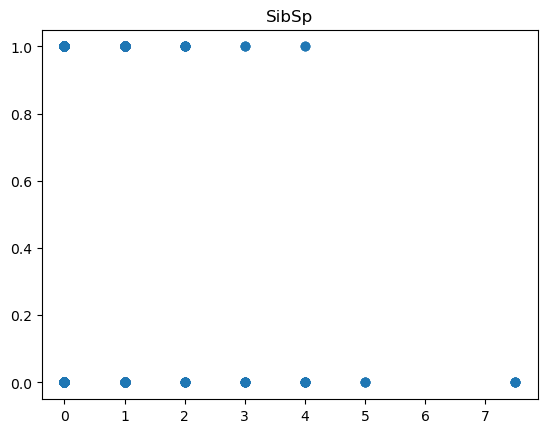

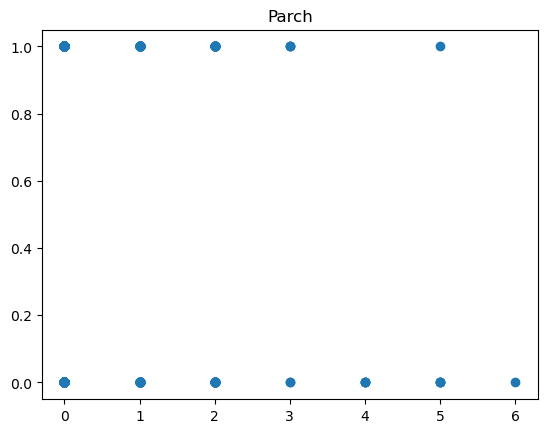

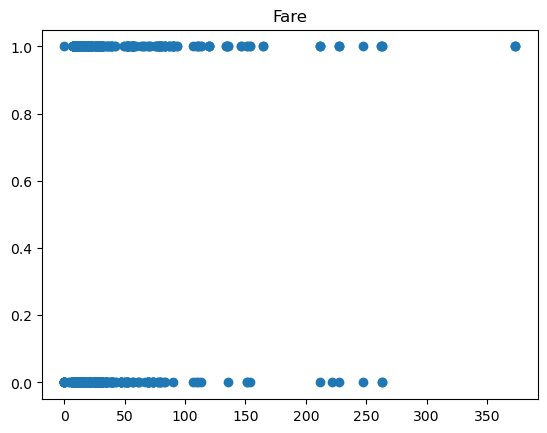

In [42]:
import matplotlib.pyplot as plt
for column in traindt.columns:
    if traindt[column].dtype=="int64" or traindt[column].dtype=="float64":
        plt.title(column)
        #plt.boxplot(traindt[column])
        plt.scatter(traindt[column], traindt['Survived'])
        plt.show()
    

Handling outlier in testdt

       Age

In [43]:
np.percentile(testdt.Age ,[99])[0]

63.829999999999984

In [44]:
uv = np.percentile(testdt.Age,[99])[0]

In [45]:
testdt[(testdt.Age>1.5*uv)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [46]:
testdt.Age[(testdt.Age> 1.5*uv)] =1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\2252248143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdt.Age[(testdt.Age> 1.5*uv)] =1.5*uv


Handling outlier in SibSp

In [47]:
np.percentile(testdt.SibSp,[99])[0]

4.0

In [48]:
uv = np.percentile(testdt.SibSp,[99])[0]

In [49]:
testdt[(testdt.SibSp>1.5*uv)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,30.27259,8,2,CA. 2343,69.55,B57 B59 B63 B66,S
360,1252,3,"Sage, Master. William Henry",male,14.50000,8,2,CA. 2343,69.55,B57 B59 B63 B66,S


In [50]:
testdt.SibSp[(testdt.SibSp> 1.5*uv)] =1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\2954618223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdt.SibSp[(testdt.SibSp> 1.5*uv)] =1.5*uv


Handling outlier in Fare

In [51]:
np.percentile(testdt.Fare,[99])[0]

262.375

In [52]:
uv = np.percentile(testdt.Fare,[99])[0]

In [53]:
testdt[(testdt.Fare>11.5*uv)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
testdt.Fare[(testdt.Fare> 1.5*uv)] =1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\4274439402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdt.Fare[(testdt.Fare> 1.5*uv)] =1.5*uv


Handling outlier in Parch

In [55]:
np.percentile(testdt.Parch,[99])[0]

4.0

In [56]:
uv = np.percentile(testdt.Parch,[99])[0]

In [57]:
testdt[(testdt.Parch>1.5*uv)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
342,1234,3,"Sage, Mr. John George",male,30.27259,1,9,CA. 2343,69.55,B57 B59 B63 B66,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,30.27259,1,9,CA. 2343,69.55,B57 B59 B63 B66,S


In [58]:
testdt.Parch[(testdt.Parch> 1.5*uv)]=1.5*uv

C:\Users\User\AppData\Local\Temp\ipykernel_7364\3418335831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdt.Parch[(testdt.Parch> 1.5*uv)]=1.5*uv


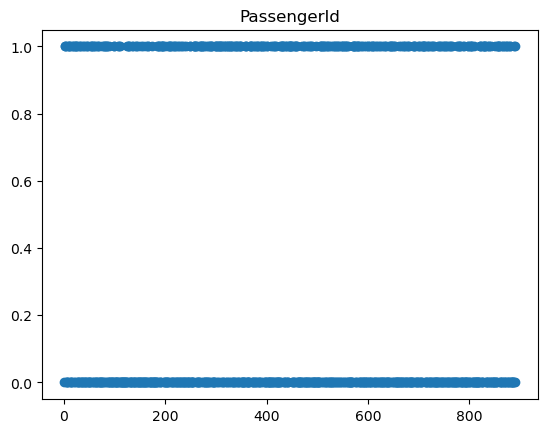

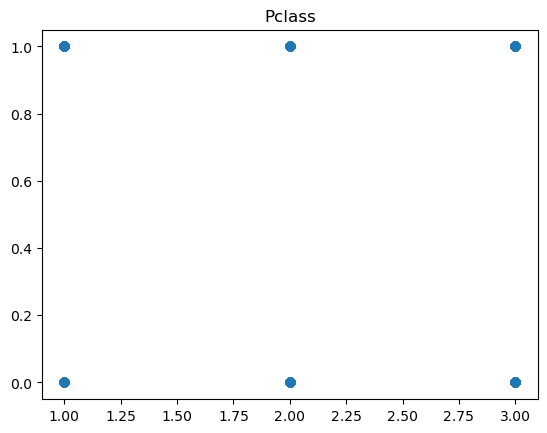

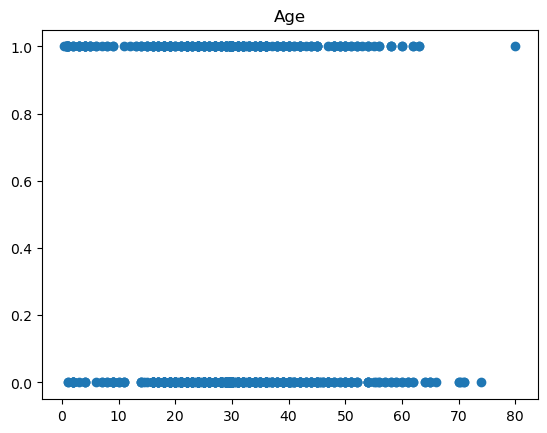

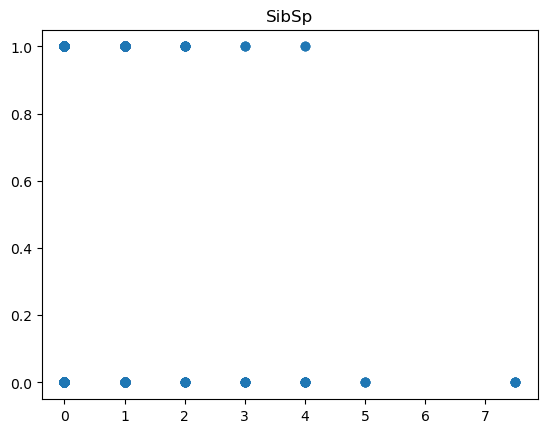

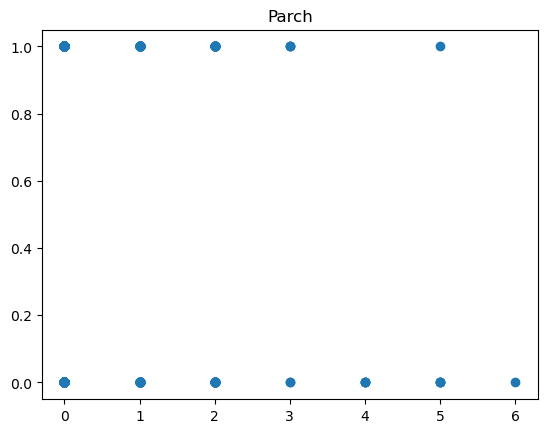

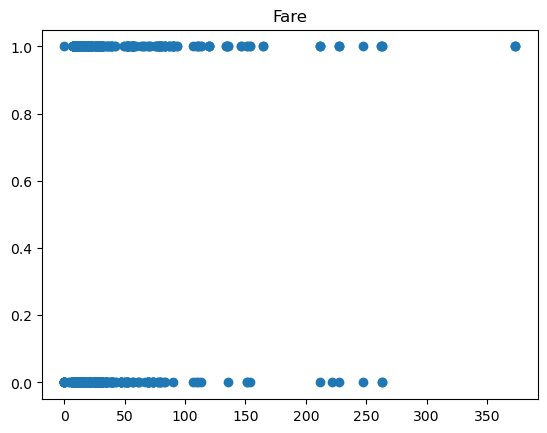

In [59]:
import matplotlib.pyplot as plt
for column in testdt.columns:
    if testdt[column].dtype=="int64" or testdt[column].dtype=="float64":
        #sns.scatterplot(x=traindt[column],data=traindt)
        plt.title(column)
        #plt.boxplot(testdt[column])
        plt.scatter(traindt[column], traindt['Survived'])
        plt.show()

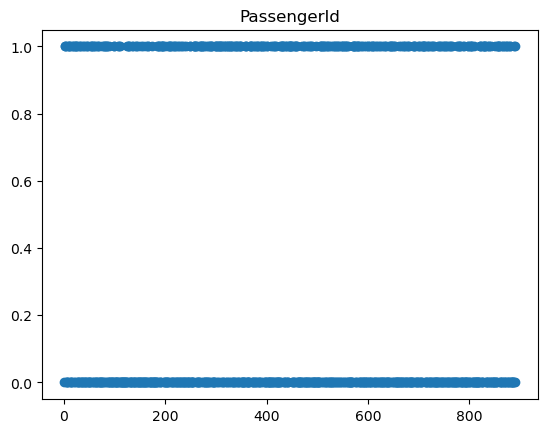

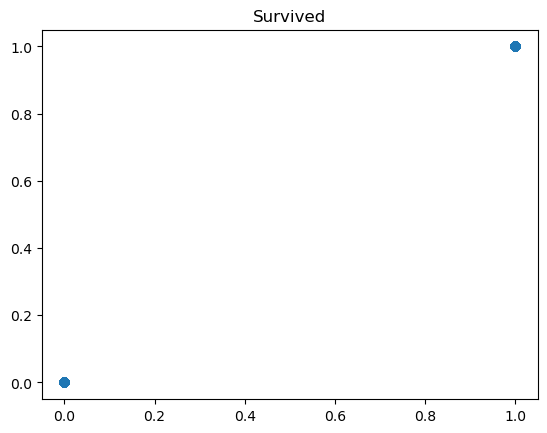

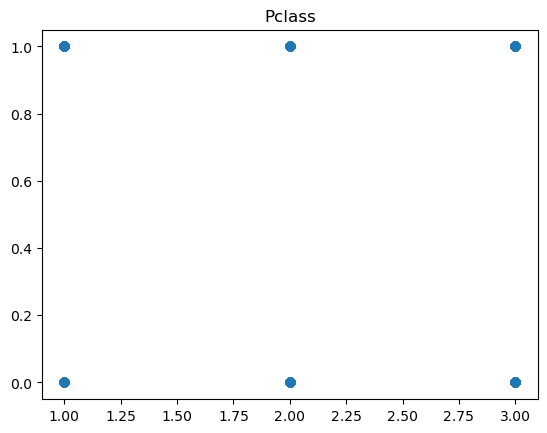

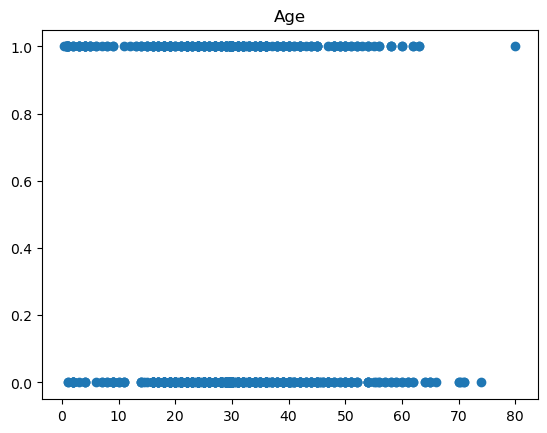

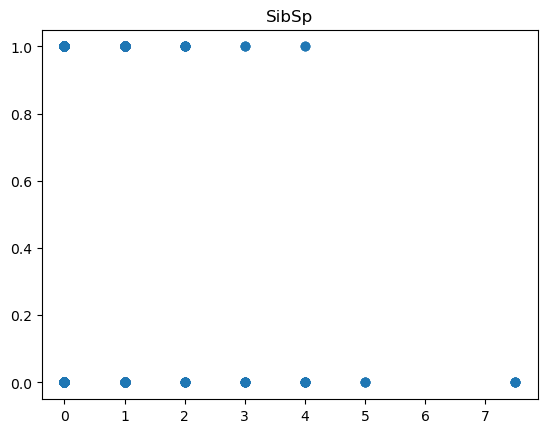

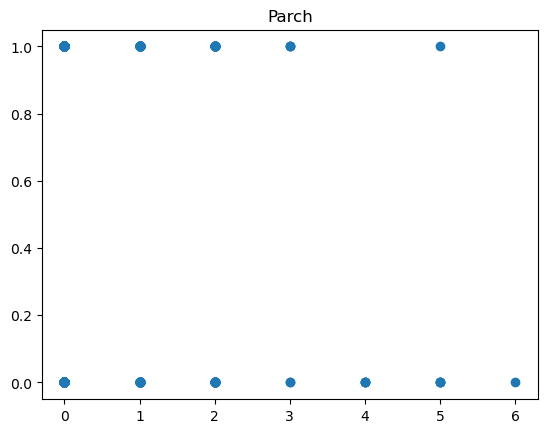

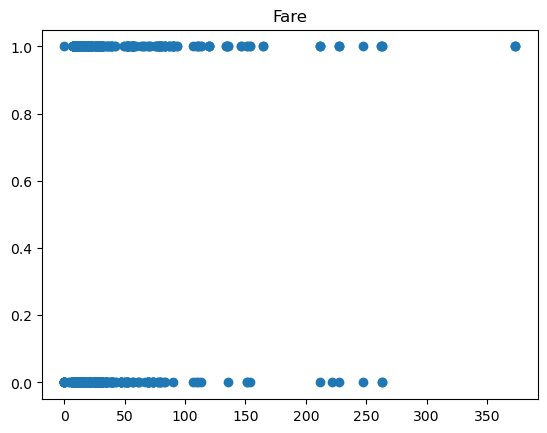

In [60]:
import matplotlib.pyplot as plt
for column in traindt.columns:
    if traindt[column].dtype=="int64" or traindt[column].dtype=="float64":
        #sns.scatterplot(x=traindt[column],data=traindt)
        plt.title(column)
        #plt.boxplot(testdt[column])
        plt.scatter(traindt[column], traindt['Survived'])
        plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in traindt:
    if col != 'Segmentation':
        if traindt[col].dtypes == 'object':
            traindt[col] = le.fit_transform(traindt[col])

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in testdt:
    if testdt[col].dtypes == 'object':
        testdt[col] = le.fit_transform(testdt[col])

In [63]:
traindt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(3), int32(5), int64(4)
memory usage: 66.3 KB


In [64]:
traindt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1.0,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1.0,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0.0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1.0,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0.0,0,472,8.0500,47,2


In [65]:
testdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int32  
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int32  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int32  
 10  Embarked     418 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 27.9 KB


In [66]:
testdt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,15,1
1,893,3,403,0,47.0,1,0,221,7.0000,15,2
2,894,2,269,1,62.0,0,0,73,9.6875,15,1
3,895,3,408,1,27.0,0,0,147,8.6625,15,2
4,896,3,178,0,22.0,1,1,138,12.2875,15,2


<Axes: >

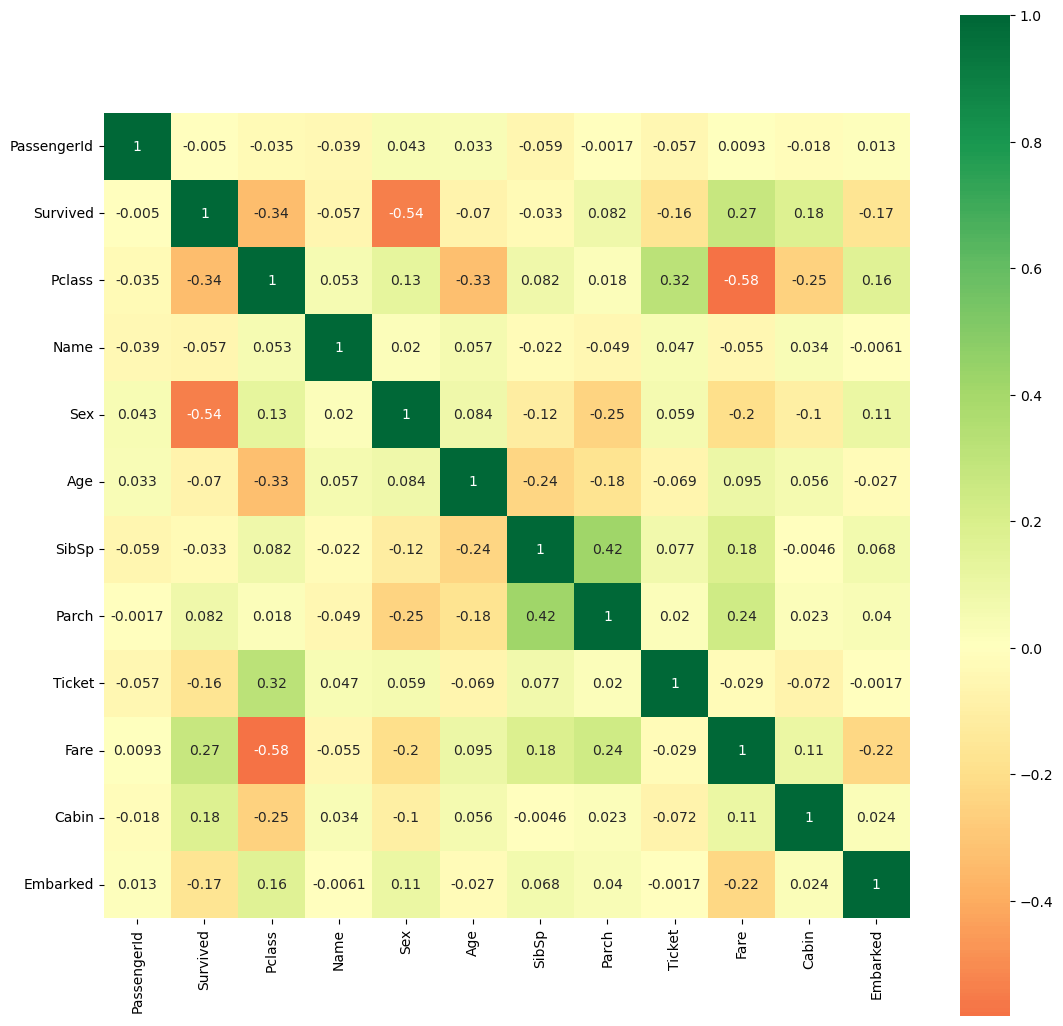

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(traindt.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


<Axes: >

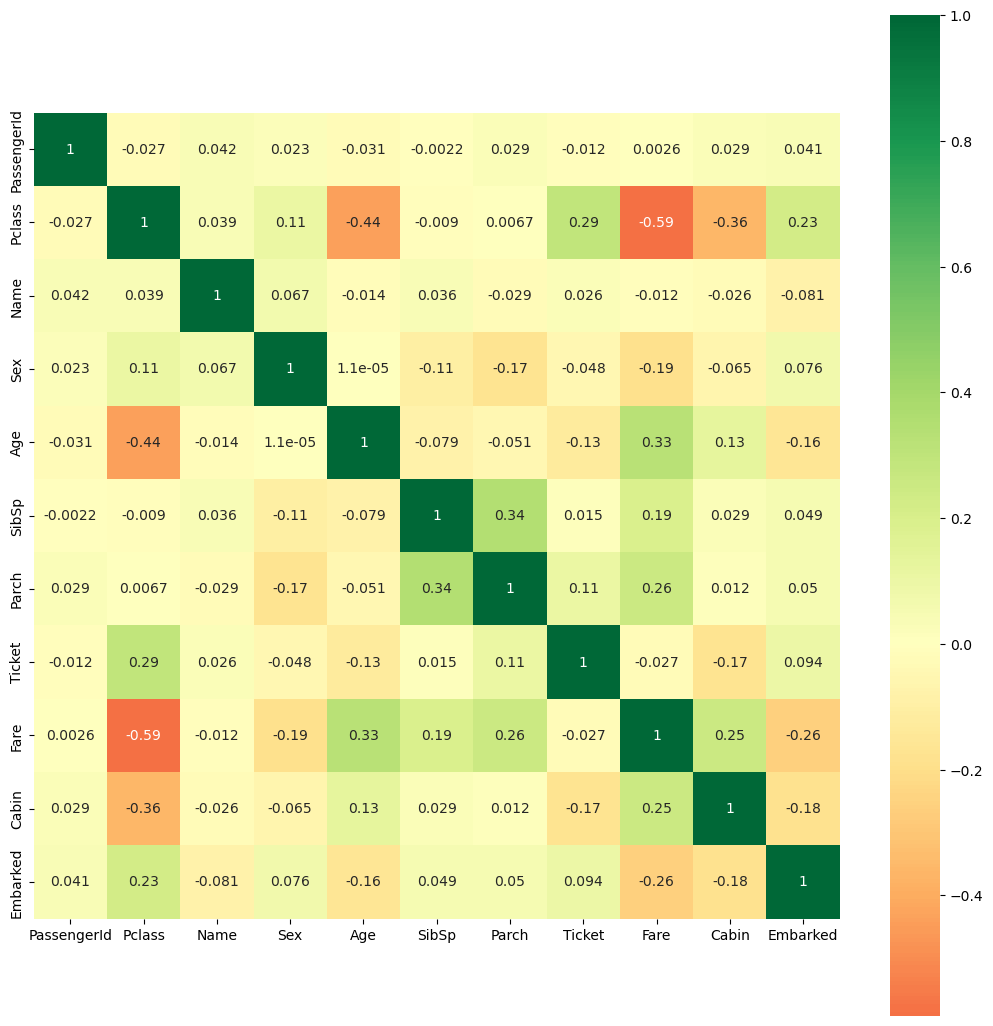

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(testdt.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


In [69]:
traindt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1.0,0,523,7.2500,47,2
1,2,1,1,190,0,38.0,1.0,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0.0,0,669,7.9250,47,2
3,4,1,1,272,0,35.0,1.0,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0.0,0,472,8.0500,47,2


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

X = traindt.drop('Survived', axis=1)
y = traindt['Survived']

model.fit(X, y)

GradientBoostingClassifier()

In [72]:
y_preds = model.predict(testdt)

In [73]:
samp['Survived'] = y_preds

In [74]:
samp

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
samp.to_csv('Submission2.csv', index=False)